# Finding Heavy Traffic Indicators on I-94

This project aims to dertime a few indicators of heavy traffic on I-94, such as weather or time of a week.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


In [22]:
traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_data.head(5)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [23]:
traffic_data.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [24]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 1. Analyzing the traffic volume


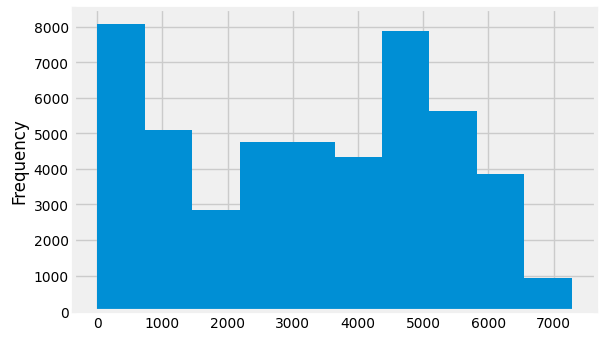

In [25]:
%matplotlib inline

traffic_data['traffic_volume'].plot.hist()
plt.show()

In [26]:
traffic_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

1. The total traffic volume is 48204 cross the dataset.

2. About 25% of the time, there are 1193 or fewer cars passing the station each hour;

3. About 50% of the time, there are 3380 or fewer cars passing the station each hour;

4. About 75% of the time, thre are 7280 or fewer cars passing the station each hour.

## 2. Daytime and traffic volume

**Divide the date_time into two parts:**

In [27]:
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])
traffic_data['Hour'] = traffic_data['date_time'].dt.hour
traffic_data[['date_time','Hour']].head()

,date_time,Hour
0,2012-10-02 09:00:00,9
1,2012-10-02 10:00:00,10
2,2012-10-02 11:00:00,11
3,2012-10-02 12:00:00,12
4,2012-10-02 13:00:00,13


In [28]:
daytime = traffic_data[(traffic_data['Hour'] >=7)&(traffic_data['Hour'] <19)]
nighttime = traffic_data[(traffic_data['Hour'] >=19) | (traffic_data['Hour'] < 7)]

print('daytime counts:', len(daytime))
print('nighttime counts:', len(nighttime))


daytime counts: 23877
nighttime counts: 24327


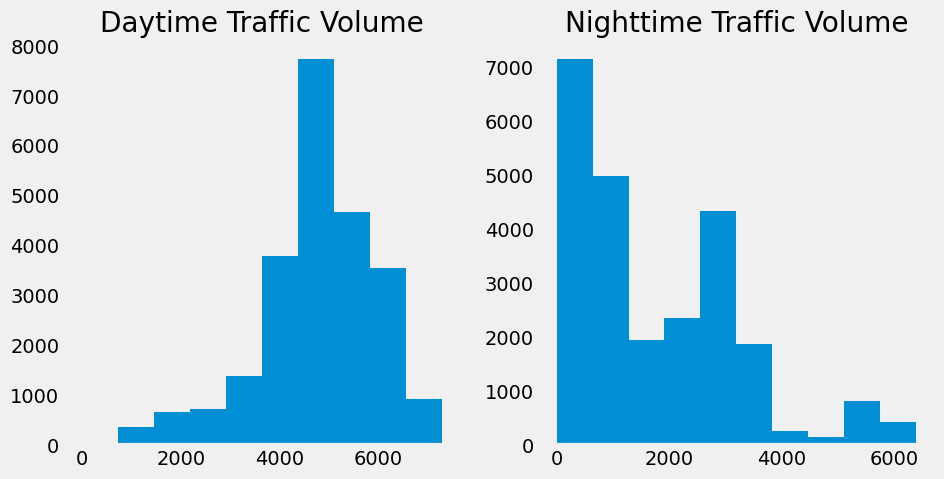

In [29]:
style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols =2, 
                             figsize=(10,5))
ax1.hist(daytime['traffic_volume'])
ax1.set_title('Daytime Traffic Volume')
ax1.grid(False)

ax2.hist(nighttime['traffic_volume'])
ax2.set_title('Nighttime Traffic Volume')
ax2.grid(False)

In [30]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [31]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime traffic volume graph is more densed between 1000 to 8000, and 75% of the daytime, the traffic volume is around or less than 5559.

The nighttime traffic volume graph has much traffic counts between 0 to 4000, indicating that the traffic volume are less durting nighttime. About 75% time of the night, the traffic volume is less than 2819. 

Therefore, there are more traffic volume during daytime comparing to nighttime.

## 3. Time indicators

Since daytime traffic volume is much higher than nighttime, we can focus on the daytime data. 

In [32]:
daytime_data = daytime.copy()
daytime_data.reset_index(drop=True, inplace=True)


**By Month**

In [33]:
daytime_data['month'] = daytime_data['date_time'].dt.month

In [34]:
by_month = daytime_data.groupby('month').mean()

Text(0.5, 1.0, 'Avg. Traffic Volume Change with Month')

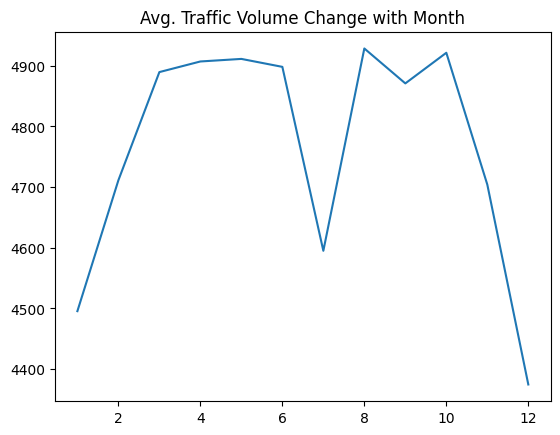

In [35]:
style.use('default')
plt.plot(by_month.index, by_month['traffic_volume'])
plt.grid(False)
plt.title('Avg. Traffic Volume Change with Month')


From this graph, we can find that months 3 - 6, and 8-10 have high traffic volumes, while month 1,2,7,11,and 12 have relative low traffic volumes. 

This may be caused by some holidays or vocations during these low traffic volume months.

In [36]:
daytime_data['holiday'].value_counts(dropna=False)

None    23877
Name: holiday, dtype: int64

However, there are no holidays during these months. So we can analyze from other aspects.

**By Week**

In [37]:
daytime_data['week'] = daytime_data['date_time'].dt.dayofweek
by_week = daytime_data.groupby('week').mean()
by_week

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Hour,month
week,,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,12.472732,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,12.369994,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,12.453411,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,12.459739,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,12.454545,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,12.391573,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,12.415244,6.604179


Text(0.5, 1.0, 'Avg. Traffic Volume Change with Weekday')

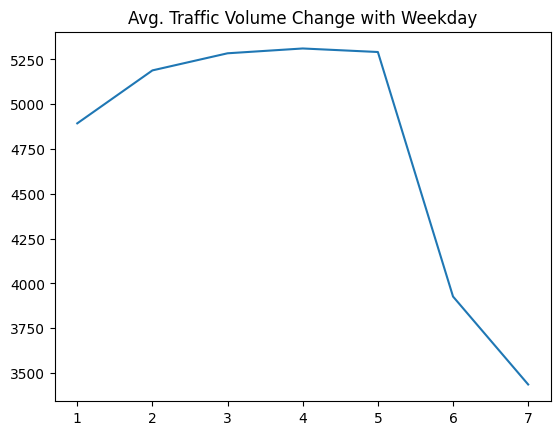

In [38]:
plt.plot(range(1,8), by_week['traffic_volume'])
plt.title('Avg. Traffic Volume Change with Weekday')

When plot the traffic volume by weekday, we can know that from Monday to Friday, the traffic volumes passing the station are very high with a number over 5000. However, during the weekend, the traffic volumes apparently dropped.

**By Day**

In [39]:
weekday = daytime_data[daytime_data['week']< 5].copy()
weekday.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Hour,month,week
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,10,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,10,1


In [40]:
weekend = daytime_data[daytime_data['week']>=5]
weekend.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Hour,month,week
42,None,275.17,0.0,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,7,10,5
43,None,274.99,0.0,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,8,10,5
44,None,275.09,0.0,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,9,10,5
45,None,276.88,0.0,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,10,10,5
46,None,278.04,0.0,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,11,10,5


In [41]:
by_hour_weekday = weekday.groupby('Hour').mean()
by_hour_weekend = weekend.groupby('Hour').mean()

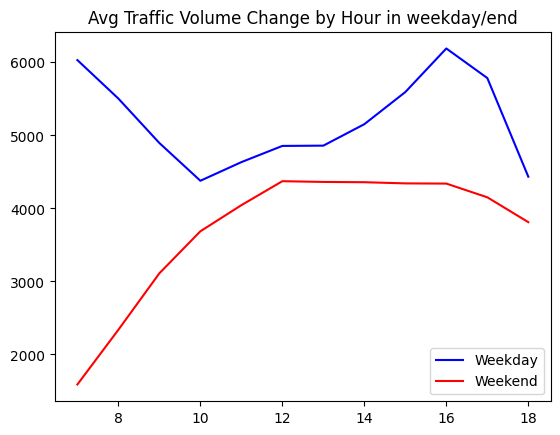

In [42]:
fig, ax = plt.subplots()

ax.plot(by_hour_weekday.index, by_hour_weekday['traffic_volume'],
         color='blue', label='Weekday')
ax.plot(by_hour_weekend.index, by_hour_weekend['traffic_volume'],
         color='red', label='Weekend')
ax.set_title('Avg Traffic Volume Change by Hour in weekday/end')
ax.legend()



During weekday, it seems working hours from moring 6 to 9am and 15 to 17pm have more traffic volumes. 

While on weekend, high traffic volume normally appears after 12pm. 

## 4. Weather Indicators

In [44]:
daytime_data.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Hour              0.172704
month            -0.022337
week             -0.416453
Name: traffic_volume, dtype: float64

It seems just the temperature indicator has a relative high correlation index to traffic volume.

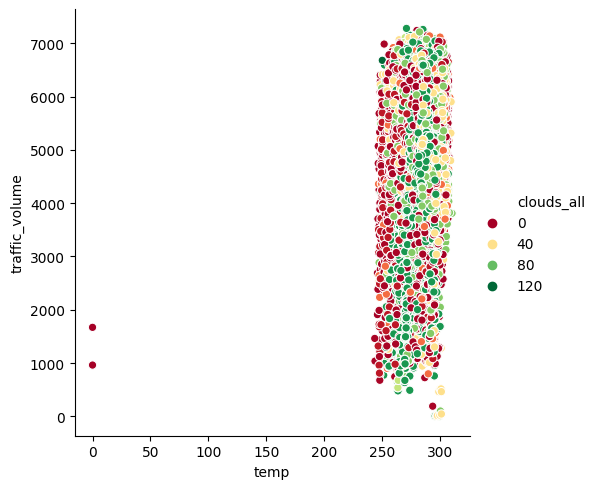

In [51]:

sns.relplot(data=daytime_data, x='temp', y='traffic_volume',
            hue='clouds_all', palette='RdYlGn')
plt.show()

When plot the relationship graph between tem and traffic volume, it seems the relationship is not relaible.

So let's explore the another two possible indicators: weather_main and weather_description.

**By Weather_main**

In [52]:
daytime_data['weather_main'].value_counts()

Clouds          8702
Clear           5744
Rain            2841
Mist            2593
Snow            1454
Drizzle          883
Haze             834
Thunderstorm     451
Fog              362
Smoke             12
Squall             1
Name: weather_main, dtype: int64

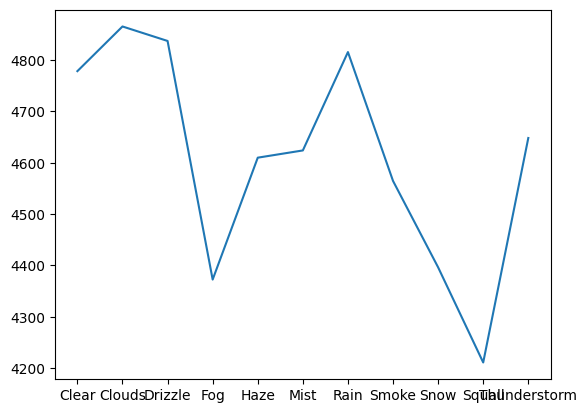

In [54]:
by_weather_main = daytime_data.groupby('weather_main').mean()

plt.plot(by_weather_main.index, by_weather_main['traffic_volume'])
plt.show()

From this graph, we can get the idea that the traffic volume will dramatically dropped in fog, snow, squall, or theunder days. It makes sense as people often reduce outdoor activities for safety during bad weathers.

In [53]:
daytime_data['weather_description'].value_counts()

sky is clear                           4892
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain    

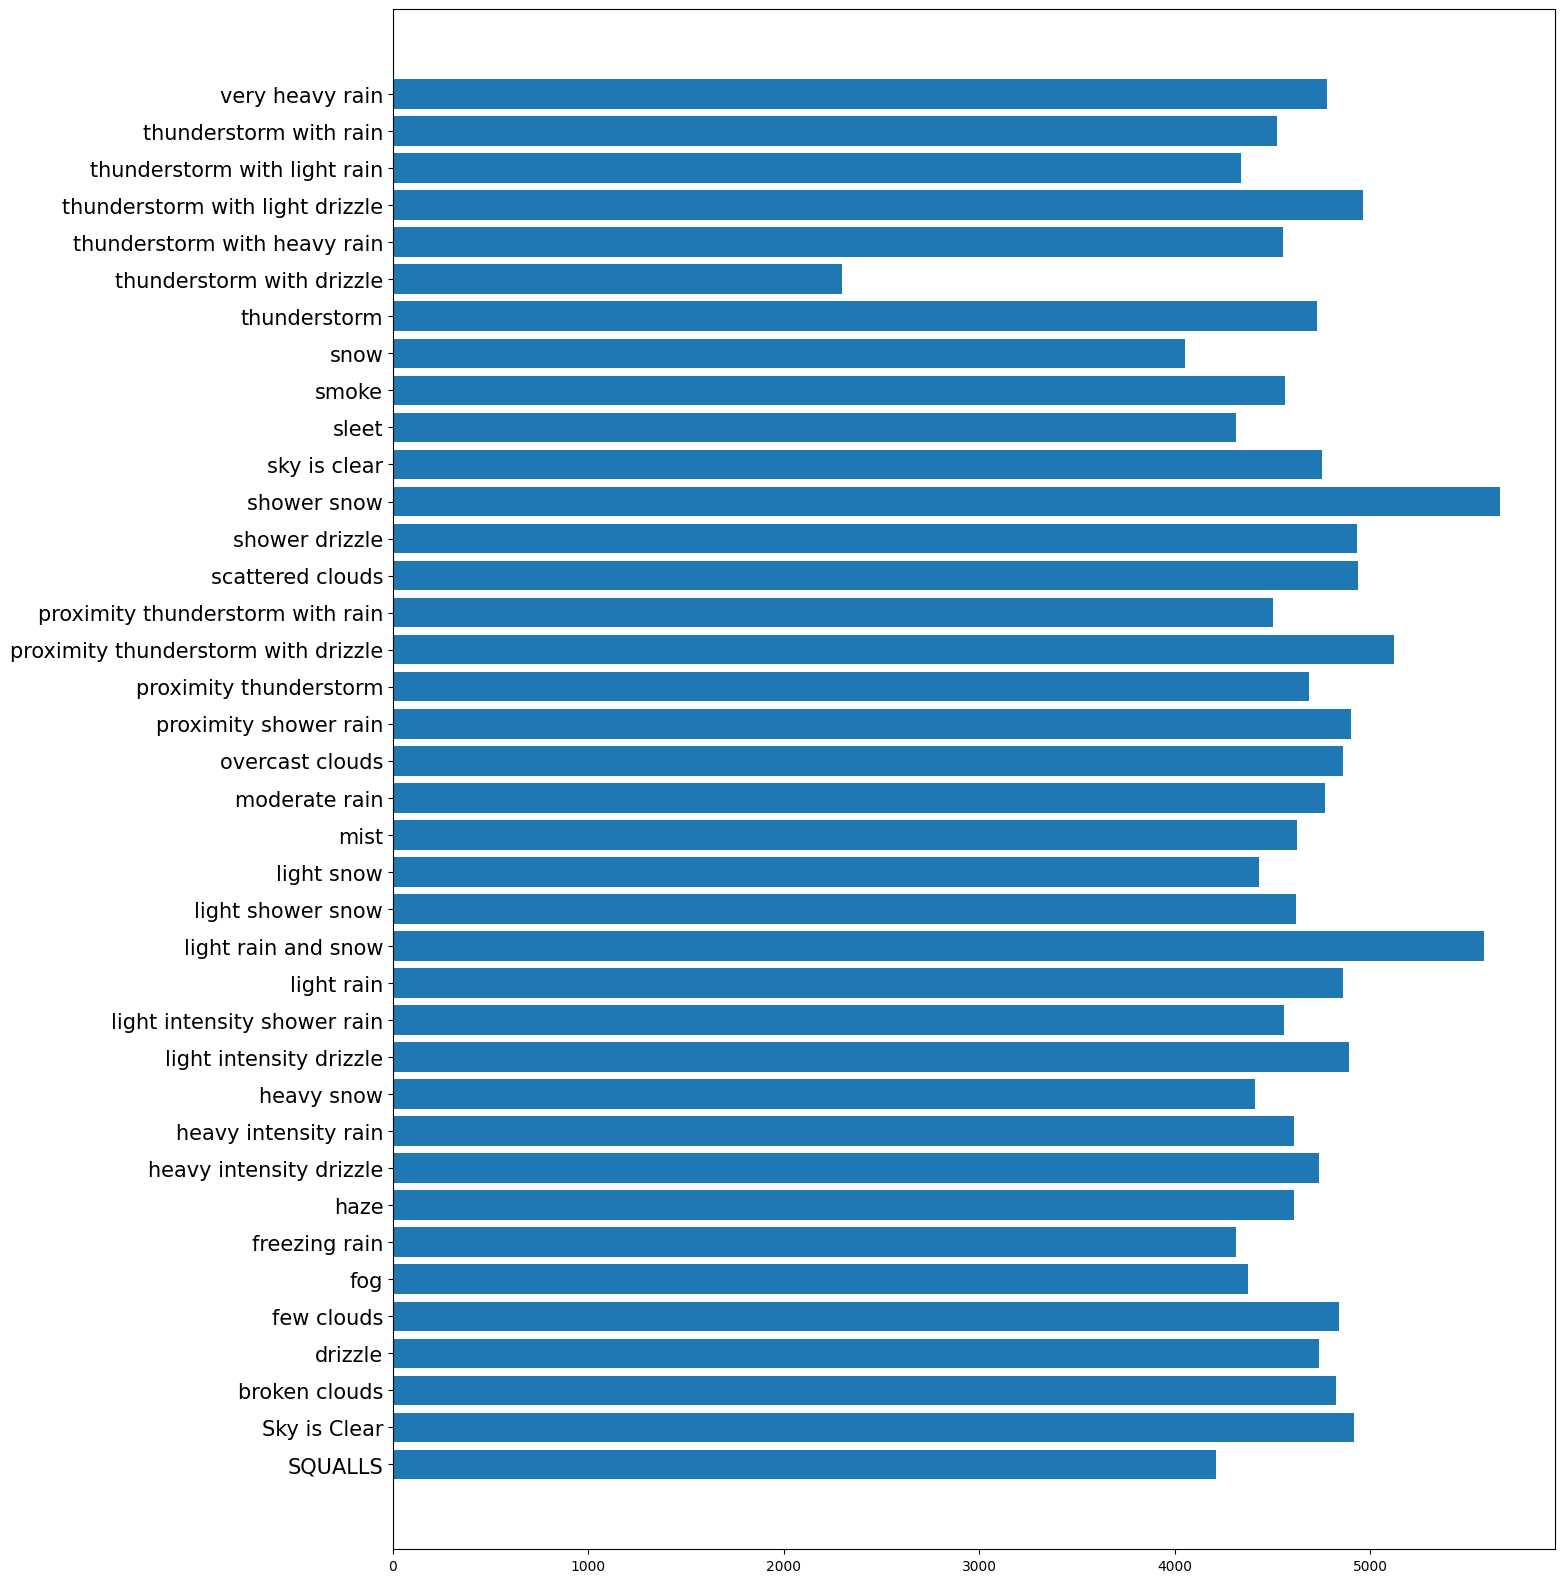

In [66]:
by_weather_desc = daytime_data.groupby('weather_description').mean()
plt.figure(figsize=(15,20))
plt.barh(by_weather_desc.index, by_weather_desc['traffic_volume'])
plt.yticks(fontsize=15)
plt.show()

This chart displays more details between weather and traffic volumes. The weatehr types are more detailed and we can know specific traffic volume under different weather, for example, the traffic volume is least (zround 2500) under thunderstorm with dizzle days.

**Conslusions**

By analyzing various elements in the dataset, we can find that there are several indicators that affect the traffic volume passing I-94:

1. Daytime: the traffic volume is more heavy during daytime (7am to 7pm) than during night time (7pm to 7am)


2. Month: the traffic volume during Mar to Jun and Aug to Oct is heavier than the remain months, and Dec has the lest traffic volume in a year.


3. Weekday: traffic volume is much heavier in weekday than weekend.


4. Hour: the specific hour impacts to traffic volume is related to weekday. During peak hours of business day would have much traffic volume, while tha traffic volume become higher after 12pm in weekeds.


5. Weather: traffic volume dramatically dropped in bad weathers such as thunder, fog, or dizzle.